In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

or_data = pd.read_excel('../Q3data/original_data.xls',encoding='gbk')
or_data.head()

,热水器编号,发生时间,开关机状态,加热中,保温中,有无水流,实际温度,热水量,水流量,节能模式,加热剩余时间,当前设置温度
0,R_00001,20141019063917,关,关,关,无,30°C,0%,0,关,0分钟,50°C
1,R_00001,20141019070154,关,关,关,无,30°C,0%,0,关,0分钟,50°C
2,R_00001,20141019070156,关,关,关,无,30°C,0%,8,关,0分钟,50°C
3,R_00001,20141019071230,关,关,关,无,30°C,0%,0,关,0分钟,50°C
4,R_00001,20141019071236,关,关,关,无,29°C,0%,0,关,0分钟,50°C


In [2]:
data = or_data.drop(or_data.columns[[0,5,9]],axis=1)  # 删掉不相关属性
data.to_excel('./data/data_protocol.xlsx',index=False)
data.head()

,发生时间,开关机状态,加热中,保温中,实际温度,热水量,水流量,加热剩余时间,当前设置温度
0,20141019063917,关,关,关,30°C,0%,0,0分钟,50°C
1,20141019070154,关,关,关,30°C,0%,0,0分钟,50°C
2,20141019070156,关,关,关,30°C,0%,8,0分钟,50°C
3,20141019071230,关,关,关,30°C,0%,0,0分钟,50°C
4,20141019071236,关,关,关,29°C,0%,0,0分钟,50°C


In [4]:
data[u'发生时间'] = pd.to_datetime(data[u'发生时间'], format = '%Y%m%d%H%M%S')  # 将时间列转成日期格式
print("删除冗余特征后的(数据总量, 列数)为：", data.shape)
data.head(10)

删除冗余特征后的(数据总量, 列数)为： (18840, 9)


,发生时间,开关机状态,加热中,保温中,实际温度,热水量,水流量,加热剩余时间,当前设置温度
0,2014-10-19 06:39:17,关,关,关,30°C,0%,0,0分钟,50°C
1,2014-10-19 07:01:54,关,关,关,30°C,0%,0,0分钟,50°C
2,2014-10-19 07:01:56,关,关,关,30°C,0%,8,0分钟,50°C
3,2014-10-19 07:12:30,关,关,关,30°C,0%,0,0分钟,50°C
4,2014-10-19 07:12:36,关,关,关,29°C,0%,0,0分钟,50°C
5,2014-10-19 07:16:02,关,关,关,30°C,0%,0,0分钟,50°C
6,2014-10-19 07:16:08,关,关,关,29°C,0%,0,0分钟,50°C
7,2014-10-19 07:20:05,关,关,关,30°C,0%,0,0分钟,50°C
8,2014-10-19 07:20:10,关,关,关,29°C,0%,0,0分钟,50°C
9,2014-10-19 07:21:53,关,关,关,30°C,0%,0,0分钟,50°C


In [7]:
# （2）数据变换 data_exchange_divideEvent.py
# 一次完整用水事件的划分模型
# 方法：判断流量大于0的记录的时间差是否超过阈值，是，则是两次事件，否，则是一次事件
# -*- utf-8 -*-
# 第一步：探索划分一次完整用水事件的时间间隔阈值
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(9,6))
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

inputfile = './data/data_protocol.xlsx'
outputfile ='./data/divide_event.xlsx'

data = pd.read_excel(inputfile)

data[u'发生时间'] = pd.to_datetime(data[u'发生时间'], format = '%Y%m%d%H%M%S')
data = data[data[u'水流量'] > 0]  # 只要流量大于0的记录
# print(len(data))  # 7679

data[u'用水停顿时间间隔'] = data[u'发生时间'].diff() / np.timedelta64(1, 'm')  # 将datetime64[ns]转成 以分钟为单位
data = data.fillna(0)  # 替换掉data[u'用水停顿时间间隔']的第一个空值
data.head()

,发生时间,开关机状态,加热中,保温中,实际温度,热水量,水流量,加热剩余时间,当前设置温度,用水停顿时间间隔
2,2014-10-19 07:01:56,关,关,关,30°C,0%,8,0分钟,50°C,0.000000
56,2014-10-19 07:38:16,关,关,关,30°C,0%,8,0分钟,50°C,36.333333
381,2014-10-19 09:46:38,关,关,关,29°C,0%,16,0分钟,50°C,128.366667
382,2014-10-19 09:46:40,关,关,关,29°C,0%,13,0分钟,50°C,0.033333
384,2014-10-19 09:47:15,关,关,关,29°C,0%,20,0分钟,50°C,0.583333


In [8]:
#-----第*2*步-----数据探索，查看各数值列的最大最小和空值情况
data_explore = data.describe().T
data_explore['null'] = len(data)-data_explore['count']
explore = data_explore[['min','max','null']]
explore.columns = [u'最小值',u'最大值',u'空值数']
explore

,最小值,最大值,空值数
水流量,8.0,77.000000,0.0
用水停顿时间间隔,0.0,2093.366667,0.0


In [9]:
# ----第*3*步-----离散化与面元划分
# 将时间间隔列数据划分为0~0.1，0.1~0.2，0.2~0.3....13以上，由数据描述可知，
# data[u'用水停顿时间间隔']的最大值约为2094，因此取上限2100
Ti = list(data[u'用水停顿时间间隔'])  # 将要面元化的数据转成一维的列表
timegaplist = [0.0,0.1,0.2,0.3,0.5,1,2,3,4,5,6,7,8,9,10,11,12,13,2100]  # 确定划分区间

cats = pd.cut(Ti,timegaplist,right=False)  # 包扩区间左端,类似"[0,0.1)",（默认为包含区间右端）
x = pd.value_counts(cats)
x.sort_index(inplace = True)
dx = DataFrame(x,columns=['num'])
dx['fn'] = dx['num']/sum(dx['num'])
dx['cumfn'] = dx['num'].cumsum()/sum(dx['num'])

f1 = lambda x :'%.2f%%' %  (x*100)
dx[['f']]= dx[['fn']].applymap(f1)
dx

,num,fn,cumfn,f
"[0.0, 0.1)",5585,0.725702,0.725702,72.57%
"[0.1, 0.2)",1391,0.180743,0.906445,18.07%
"[0.2, 0.3)",329,0.042749,0.949194,4.27%
"[0.3, 0.5)",117,0.015203,0.964397,1.52%
"[0.5, 1.0)",43,0.005587,0.969984,0.56%
"[1.0, 2.0)",31,0.004028,0.974012,0.40%
"[2.0, 3.0)",15,0.001949,0.975962,0.19%
"[3.0, 4.0)",14,0.001819,0.977781,0.18%
"[4.0, 5.0)",1,0.000130,0.977911,0.01%
"[5.0, 6.0)",8,0.001040,0.978950,0.10%


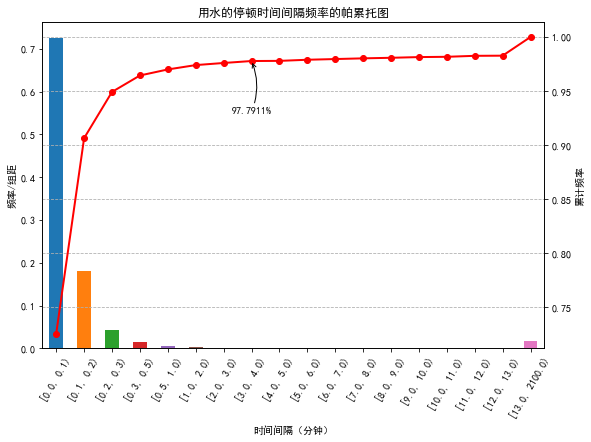

In [10]:
#-----第*4*步-----画用水停顿时间间隔频率的帕累托图
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.rcParams['figure.constrained_layout.use'] = True 
dx['fn'].plot(kind='bar')
plt.ylabel(u'频率/组距')
plt.xlabel(u'时间间隔（分钟）')
p = 1.0 * dx['fn'].cumsum()/dx['fn'].sum()  # 数值等于 dx['cumfn']，但类型是列表
dx['cumfn'].plot(color = 'r', secondary_y = True, style = '-o',linewidth = 2)
plt.annotate(format((p[4]), '.4%'), xy = (7, p[4]), xytext=(7*0.9, p[4]*0.95), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))  # 绘制文本与箭头。
plt.ylabel(u'累计频率')

plt.title(u'用水的停顿时间间隔频率的帕累托图')
plt.grid(axis='y',linestyle='--')

# fig.autofmt_xdate()  # 自动根据标签长度进行旋转
for label in ax.xaxis.get_ticklabels():   # 此语句完成功能同上,但是可以自定义旋转角度
       label.set_rotation(60)

plt.savefig('./data/画用水停顿时间间隔频率的帕累托图.jpg')
plt.show()

In [11]:
#-----第*5*步-----：确定一次用水事件停顿阈值后，开始划分一次完整事件
threshold = pd.Timedelta(minutes=4)  # 阈值为四分钟
d = data[u'发生时间'].diff() > threshold  # 相邻时间做差分，比较是否大于阈值
data[u'事件编号'] = d.cumsum() + 1  # 通过累计求和的方式为事件编号

data.to_excel(outputfile)
data.head()

,发生时间,开关机状态,加热中,保温中,实际温度,热水量,水流量,加热剩余时间,当前设置温度,用水停顿时间间隔,事件编号
2,2014-10-19 07:01:56,关,关,关,30°C,0%,8,0分钟,50°C,0.000000,1
56,2014-10-19 07:38:16,关,关,关,30°C,0%,8,0分钟,50°C,36.333333,2
381,2014-10-19 09:46:38,关,关,关,29°C,0%,16,0分钟,50°C,128.366667,3
382,2014-10-19 09:46:40,关,关,关,29°C,0%,13,0分钟,50°C,0.033333,3
384,2014-10-19 09:47:15,关,关,关,29°C,0%,20,0分钟,50°C,0.583333,3


In [12]:
# dataExchange_thresholdOptimization.py
# -*- utf-8 -*-
# 用水事件阈值寻优模型
# 第一步：确定阈值的变化与划分得到的事件个数关系

import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt


inputfile = './data/dataExchange_divideEvent.xlsx'
data = pd.read_excel(inputfile)
data.tail()
data.drop([u'事件编号'],axis=1,inplace = True)
data.to_excel('thresholdOptimization.xlsx')

,Unnamed: 0,发生时间,开关机状态,加热中,保温中,实际温度,热水量,水流量,加热剩余时间,当前设置温度,用水停顿时间间隔,事件编号
18742,18742,2014-11-10 22:00:38,开,开,关,37°C,25%,26,17分钟,50°C,0.033333,170
18743,18743,2014-11-10 22:00:42,开,开,关,37°C,25%,23,17分钟,50°C,0.066667,170
18744,18744,2014-11-10 22:00:46,开,开,关,37°C,25%,25,17分钟,50°C,0.066667,170
18798,18798,2014-11-10 22:19:43,开,关,开,50°C,50%,8,0分钟,50°C,18.950000,171
18800,18800,2014-11-10 22:49:07,开,关,开,50°C,50%,8,0分钟,50°C,29.400000,172


In [13]:
#确定阈值与事件数的关系
#****************************
#@1  目标：确定阈值的变化与划分得到的事件个数关系
#    方法：通过频率分布直方图
#****************************
timedeltalist = np.arange(1,9,0.25)
# 从2.25到8.25间，以间隔为0.25，确定阈值即，阈值范围为[2.25,2.5,2.75,3,...,7.75,8]
counts = [] # 记录不同阈值下的事件个数
for i in range(len(timedeltalist)):
    threshold = pd.Timedelta(minutes = timedeltalist[i])#阈值为四分钟
    d = data[u'发生时间'].diff() > threshold #  # 相邻时间做差分，比较是否大于阈值
    data[u'事件编号'] = d.cumsum() + 1 # 通过累积求和的方式为事件编号
    temp = data[u'事件编号'].max()
    counts.append(temp)

print(counts)

[232, 227, 218, 207, 201, 197, 194, 191, 186, 181, 178, 174, 172, 172, 171, 171, 171, 169, 164, 164, 163, 161, 159, 158, 158, 158, 155, 154, 153, 153, 152, 150]


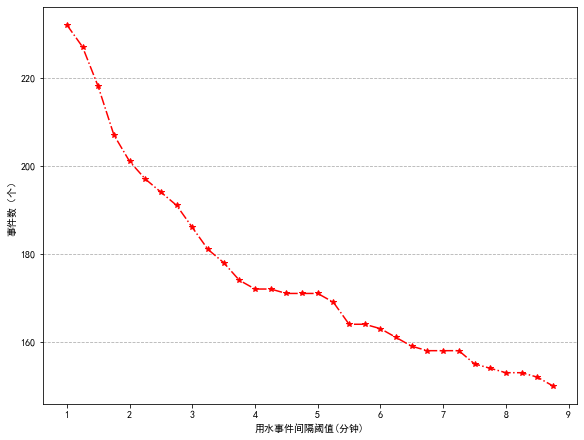

In [16]:
# 画频率分布直方图
# 将阈值与对应的事件数绘制成频率分布直方图，以确定最优阈值
from pandas import Series
coun = Series(counts, index=timedeltalist)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']= False
plt.rc('figure', figsize=(8,6))
np.set_printoptions(precision=4)
fig = plt.figure()
fig.set(alpha=0.2)  # 设置图标透明度
ax = fig.add_subplot(1,1,1)
# coun.plot(linestyle='-.',color='r',marker='<')
coun.plot(style='-.r*')#同上
ax.locator_params('x',nbins = int(len(coun)/2)+1)
ax.set_xlabel(u'用水事件间隔阈值(分钟)')
ax.set_ylabel(u'事件数（个）')
ax.grid(axis='y',linestyle='--')
plt.savefig('./data/阈值与对应的用水事件数的频率分布直方图.jpg')
plt.show()
# 由图可知，图像趋势平缓说明用户的停顿习惯趋于稳定，所以取该段时间开始作为阈值，既不会将短的用水时间合并，也不会将长的用水时间拆开
# 因此，最后选取一次用水时间间隔阈值为4分钟
# 利用阈值的斜率指标来作为某点的斜率指标

In [18]:
# 第二步：阈值优化
#****************************
#@2  目标：确定阈值的变化与划分得到的事件个数关系
#    方法：通过图像中斜率指标
#****************************

# 当存在阈值的斜率指标 k<KS1 :
#     取阈值最小的点A（可能存在多个阈值的斜率指标小于1）的横坐标x作为用水事件划分的阈值（该值是经过实验数据验证的专家阈值）
# 当不存在阈值的斜率指标 k<KS：
#     找所有阈值中“斜率指标最小”的阈值t1：
#     若：该阈值t1对应的斜率指标小于KS2：
#         则取该阈值作为用水事件划分的阈值
#     若：该阈值t1对应的斜率指标不小于KS2
#         则阈值取默认值——4分钟
# 备注：
# KS1是评价斜率指标用的专家阈值1
# KS2是评价斜率指标用的专家阈值2

data = pd.read_excel('./data/divide_event.xlsx')
n = 4  # 使用以后四个点的平均斜率
KS = 1  # 专家阈值1
KS2 = 5  # 专家阈值2
def event_num(ts):
    d = data[u'发生时间'].diff() > ts  # 相邻时间做差分，比较是否大于阈值
    return d.sum()+1  # 直接返回事件数

dt = [pd.Timedelta(minutes = i) for i in np.arange(1,9,0.25)]
h = DataFrame(dt,columns = [u'阈值'])  # 定义阈值列
h[u'事件数'] = h[u'阈值'].apply(event_num)  # 计算每个阈值对应的事件数
h[u'斜率'] = h[u'事件数'].diff()/0.25  # 计算每个相邻点对应的斜率
h[u'斜率指标偏移前'] = (h[u'斜率'].abs()).rolling(n).mean()  # 采用当前指标和后n个指标斜率的绝对值的平均作为当前指标的斜率

h[u'斜率指标'] = np.nan
h[u'斜率指标'][:-4] = h[u'斜率指标偏移前'] [4:]

mink = h[u'斜率指标'][h[u'斜率指标'] < KS]  # 斜率指标小于1的值的集合
mink1 = h[u'斜率指标'][h[u'斜率指标'] < KS2]  # 斜率指标小于5的值的集合

if list(mink):  # 斜率指标值小于1不为空时，即，存在斜率指标值小于1时
    minky = [h[u'阈值'][i] for i in mink.index]  # 取“阈值最小”的点A所对应的间隔时间作为ts
    ts = min(minky)  # 取最小时间为ts
elif list(mink1):  # 当不存在斜率指标值小于1时，找所有阈值中“斜率指标最小”的阈值
    t1 = h[u'阈值'][h[u'斜率指标'].idxmin()]  # “斜率指标最小”的阈值t1
    # ts = h[u'阈值'][h[u'斜率指标偏移前'].idxmin() - n]  # 等价于前一行作用
    # 备注：用idxmin返回最小值的Index，由于rolling().mean()自动计算的是前n个斜率的绝对值的平均，所以结果要平移-n，得到偏移后的各个值的斜率指标，注意：最后四个值没有斜率指标因为找不出在它以后的四个更长的值
    if h[u'斜率指标'].min()<5:
        ts = t1  # 当该阈值的斜率指标小于5，则取该阈值作为用水事件划分的阈值
    else:
        ts = pd.Timedelta(minutes = 4)  # 当该阈值的斜率指标不小于5，则阈值取默认值——4分钟

tm = ts/np.timedelta64(1, 'm')

print("当前时间最优时间间隔为%s分钟" % tm)
print("当最优时间是4分钟时，事件数：")
coun[4.00]  # 可知，当最优时间是4分钟时，事件数是172个

当前时间最优时间间隔为4.0分钟
当最优时间是4分钟时，事件数：


172

In [23]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# 读取数据
Xtrain = pd.read_csv('../Q3data/sj_final.csv')
ytrain = pd.read_excel('../Q3data/water_heater_log.xlsx')
test = pd.read_excel('../Q3data/test_data.xlsx')
# 训练集测试集区分
x_train, x_test, y_train, y_test = Xtrain.iloc[:,5:],test.iloc[:,4:-1],\
                                   ytrain.iloc[:74,-1],test.iloc[:,-1]
# 标准化
stdScaler = StandardScaler().fit(x_train)
x_stdtrain = stdScaler.transform(x_train)
x_stdtest = stdScaler.transform(x_test)
# 建立模型
bpnn = MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto', hidden_layer_sizes = (10,17), max_iter = 200, solver = 'lbfgs',random_state=50)
bpnn.fit(x_stdtrain, y_train)
# # 保存模型
joblib.dump(bpnn,'../Q3data/water_heater_nnet.m')
print('构建的模型为：\n',bpnn)

构建的模型为：
 MLPClassifier(activation='identity', hidden_layer_sizes=(10, 17),
              random_state=50, solver='lbfgs')


神经网络预测结果评价报告：
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.97      1.00      0.99        37

    accuracy                           0.98        49
   macro avg       0.99      0.96      0.97        49
weighted avg       0.98      0.98      0.98        49



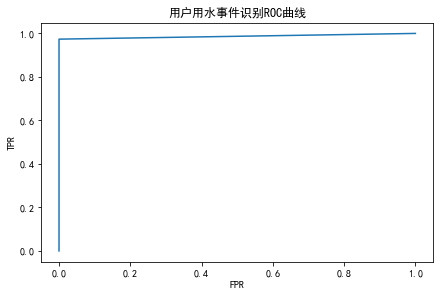

In [24]:
# 模型评价
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
bpnn = joblib.load('../Q3data/water_heater_nnet.m')  # 加载模型
y_pred = bpnn.predict(x_stdtest)  # 返回预测结果
print('神经网络预测结果评价报告：\n',classification_report(y_test,y_pred))
# 绘制roc曲线图
fpr, tpr, thresholds = roc_curve(y_pred,y_test)  # 求出TPR和FPR
plt.figure(figsize=(6,4))  # 创建画布
plt.plot(fpr,tpr)  # 绘制曲线
plt.title('用户用水事件识别ROC曲线')  # 标题
plt.xlabel('FPR')  # x轴标签
plt.ylabel('TPR')  # y轴标签
plt.savefig('../Q3data/ROC.png')  # 保存图片